Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

1) One has to predict the claim amount in the Automobile insurance dataset.


And 



2) One has to predict the insurance fraud  in the Automobile insurance dataset.



In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# 1 ) predict the claim amount in the Automobile insurance dataset.
autoclaimAmount=pd.read_csv('Auto_Insurance_Claims_amount.csv',header=0)
autoclaimAmount


,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
autoclaimAmount=autoclaimAmount.replace('?', np.NaN)

In [4]:
autoclaimAmount.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
autoclaimAmount.keys()



Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
# Applying LabelEncoder 

from sklearn.preprocessing import LabelEncoder
transcol=['Customer', 'Country', 'State Code', 'State',
       'Response', 'Coverage', 'Education','Marital Status',
       'EmploymentStatus', 'Gender', 'Location Code',
        'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']
for col in autoclaimAmount :
    
    for i in transcol:
        
        if col==i  :
            labelencoder = LabelEncoder()
            autoclaimAmount[col] = labelencoder.fit_transform(autoclaimAmount[col])

In [7]:
autoclaimAmount.describe()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.000000,9134.0,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,0.0,1.722684,1.722684,800.494047,0.143201,0.480622,1.554084,1.825706,0.490037,...,48.064594,0.384388,2.966170,0.825925,3.797788,1.014889,1.102693,434.088794,1.892380,1.089556
std,2636.903013,0.0,1.312397,1.312397,687.096761,0.350297,0.655817,1.381978,1.347793,0.499928,...,27.905991,0.910384,2.390182,0.475989,1.605978,1.072331,1.069452,290.500092,2.072992,0.537313
min,0.000000,0.0,0.000000,0.000000,189.800768,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,2283.250000,0.0,0.000000,0.000000,399.425179,0.000000,0.000000,0.000000,1.000000,0.000000,...,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,272.258244,0.000000,1.000000
50%,4566.500000,0.0,2.000000,2.000000,578.018220,0.000000,0.000000,1.000000,1.000000,0.000000,...,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,6849.750000,0.0,3.000000,3.000000,896.216704,0.000000,1.000000,3.000000,4.000000,1.000000,...,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,547.514839,4.000000,1.000000
max,9133.000000,0.0,4.000000,4.000000,8332.538119,1.000000,2.000000,4.000000,4.000000,1.000000,...,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


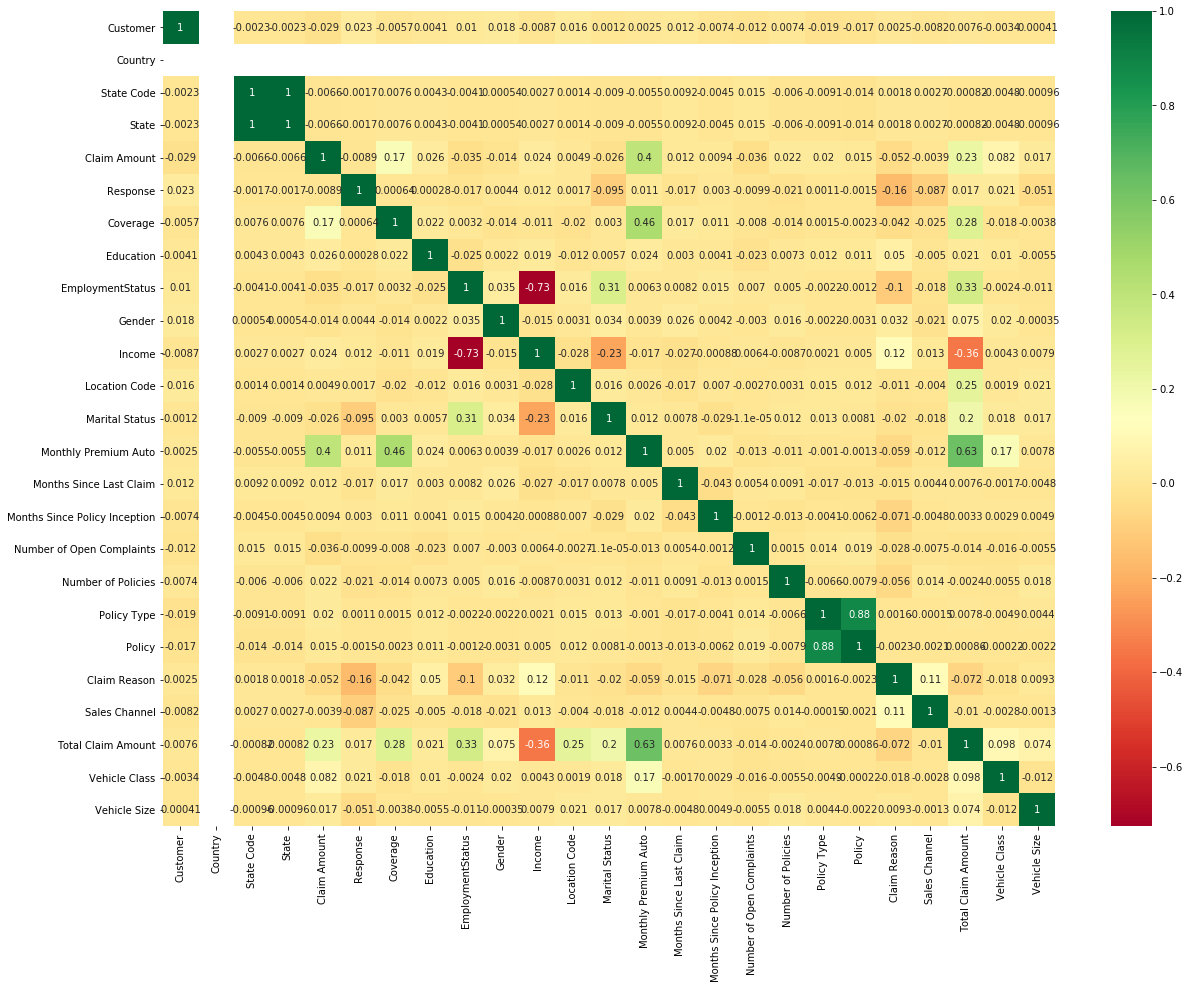

In [8]:
# Correlation of EmpData
plt.figure(figsize=(20,15))
sns.heatmap(data=autoclaimAmount.corr(),annot=True,cmap="RdYlGn")


In [9]:
# find the negative correaltion
corr=pd.DataFrame(autoclaimAmount.corr()['Claim Amount'])
corr

,Claim Amount
Customer,-0.028605
Country,NaN
State Code,-0.006629
State,-0.006629
Claim Amount,1.000000
Response,-0.008930
Coverage,0.168040
Education,0.026038
EmploymentStatus,-0.034846
Gender,-0.013610


In [10]:
# drop the negtive correlations
# drop the column 'Effective To Date' ,'Country' ,Total Claim Amount,Vehicle Size,Total Claim Amount,Policy,Number of Policies
negtivecolumns=['Customer','Country','Effective To Date', 'Total Claim Amount',
                'State Code', 'State','Response','EmploymentStatus','Marital Status','Policy','Number of Policies',
                'Gender','Number of Open Complaints','Claim Reason','Sales Channel','Vehicle Size','Total Claim Amount']
data=autoclaimAmount.drop(columns=negtivecolumns,axis=1)


In [11]:
data

,Claim Amount,Coverage,Education,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Policy Type,Vehicle Class
0,276.351928,0,0,56274,1,69,32,5,0,5
1,697.953590,1,0,0,1,94,13,42,1,0
2,1288.743165,2,0,48767,1,108,18,38,1,5
3,764.586183,0,0,0,1,106,18,65,0,3
4,281.369258,0,0,43836,0,73,12,44,1,0
...,...,...,...,...,...,...,...,...,...,...
9129,2340.598798,0,0,71941,2,73,18,89,1,0
9130,309.651122,1,1,21604,1,79,14,28,0,0
9131,816.389043,1,0,0,1,85,9,37,0,0
9132,752.444244,1,1,21941,1,96,34,3,1,0


In [12]:
# Another Methode : IQR score technique to remove Outliers 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
dfIQR = data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dfIQR.shape)

(10,)
(3765, 10)


In [13]:
# define x,y 
x=dfIQR.drop('Claim Amount',axis=1)
print(x.shape)
y=dfIQR['Claim Amount']
y=np.array(y).reshape(-1,1)
print(y.shape)

(3765, 9)
(3765, 1)


In [16]:
#I Will apply PCA on dependent data means x data,for the best model
# GET the best components for PCA using  GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
n={"n_components":range(0,8)}
pcv=GridSearchCV(pca,n,cv=10)
pcv.fit(x,y)
pcv.best_params_


{'n_components': 6}

In [17]:
# Apply the PCA
pca=PCA(n_components=6)
x=pca.fit_transform(x)
x.shape

(3765, 6)

In [18]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [19]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

287.69793600558626

In [22]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,393.471271,705.043894
1,314.281161,580.137392
2,593.601177,572.513417
3,447.681416,453.377788
4,337.007473,661.732747
...,...,...
748,472.686933,787.310481
749,785.134946,467.145501
750,1422.823432,792.034934
751,1004.928585,604.966929


In [23]:
# Saving the Model for Claims_amount
from sklearn.externals import joblib
joblib.dump(regressor,'Auto_Claims_amountl.obj')


['Auto_Claims_amountl.obj']

In [238]:
# 2) One has to predict the insurance fraud in the Automobile insurance dataset.

autoDataCsv=pd.read_csv('Automobile_insurance_fraud.csv',header=0)
autoDataCsv

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [239]:
autoDataCsv=autoDataCsv.replace('?', np.NaN)

In [240]:
autoDataCsv.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [241]:
# drop the empty column data 
autoDataCsv.drop(['_c39'],axis=1,inplace=True)


In [242]:
autoDataCsv.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [243]:
autoDataCsv.head() 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [244]:
#For categorical features  are  # 'police_report_available','property_damage','collision_type'

autoDataCsv['police_report_available']= autoDataCsv.apply(lambda x: autoDataCsv['police_report_available'].fillna(autoDataCsv['police_report_available'].value_counts().index[0]))
autoDataCsv['property_damage']= autoDataCsv.apply(lambda x: autoDataCsv['property_damage'].fillna(autoDataCsv['property_damage'].value_counts().index[0]))
autoDataCsv['collision_type']= autoDataCsv.apply(lambda x: autoDataCsv['collision_type'].fillna(autoDataCsv['collision_type'].value_counts().index[0]))


In [245]:
# Applying LabelEncoder  

from sklearn.preprocessing import LabelEncoder
transcol=['insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','policy_state', 'policy_csl', 'State Code', 'State',
       'police_report_available', 'auto_make', 'auto_model','auto_year',
        'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 
       'incident_location','fraud_reported']
for col in autoDataCsv :
    
    for i in transcol:
        
        if col==i  :
            print(i)
            labelencoder = LabelEncoder()
            autoDataCsv[col] = labelencoder.fit_transform(autoDataCsv[col])

policy_state
policy_csl
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
auto_year
fraud_reported


In [246]:
# handle null values
autoDataCsv.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [247]:
#Drop the date values

autoDataCsv.drop(['policy_bind_date','insured_zip','auto_model','auto_year','incident_date','umbrella_limit','capital-gains','capital-loss'],axis=1,inplace=True)

In [248]:
autoDataCsv.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,0.463000,2.966000,6.653000,...,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,0.498879,1.948497,4.019048,...,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000,1.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000,3.000000,7.000000,...,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,1.000000,5.000000,10.000000,...,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000,6.000000,13.000000,...,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,1.000000


In [249]:
# define x,y 
x=autoDataCsv.drop('fraud_reported',axis=1)
print(x.shape)
y=autoDataCsv['fraud_reported']
y=np.array(y).reshape(-1,1)
print(y.shape)

(1000, 30)
(1000, 1)


In [250]:
x.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [251]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [252]:
#I Will apply PCA on dependent data means x data,for the best model
# GET the best components for PCA using  GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
n={"n_components":range(0,30)}
pcv=GridSearchCV(pca,n,cv=10)
pcv.fit(x,y)
pcv.best_params_


{'n_components': 28}

In [253]:
# Apply the PCA
pca=PCA(n_components=28)
x=pca.fit_transform(x)
x.shape

(1000, 28)

In [254]:
y

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [255]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
#a default random random_state=42


In [256]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define the classification model

In [257]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)


from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [258]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("SGDClassifier",SGD))
models.append(("RandomForestClassifier",Rf))


*********** KNeighborsClassifier ************


max r2 score corresponding to 0  is  0


random state value = 0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.6954545454545454


Cross_Val_Score= 0.7370743074307431


roc_auc_score= 0.49628827714197343


classification_report
               precision    recall  f1-score   support

           0       0.72      0.94      0.82       159
           1       0.25      0.05      0.08        61

   micro avg       0.70      0.70      0.70       220
   macro avg       0.49      0.50      0.45       220
weighted avg       0.59      0.70      0.61       220



[[150   9]
 [ 58   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************


max r2 score corresponding to 0  is  0


random state value = 0
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr'

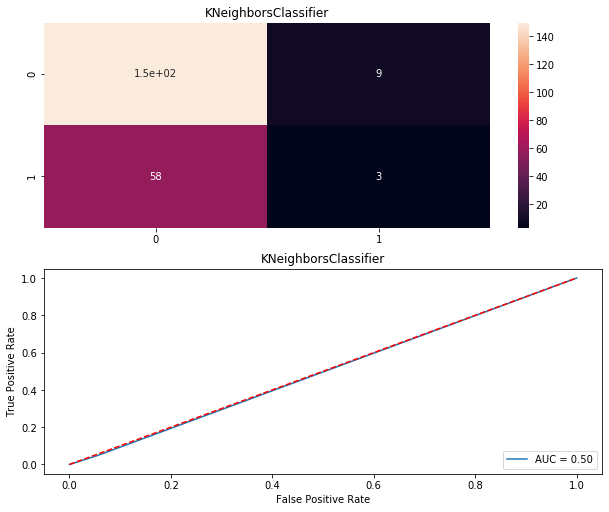

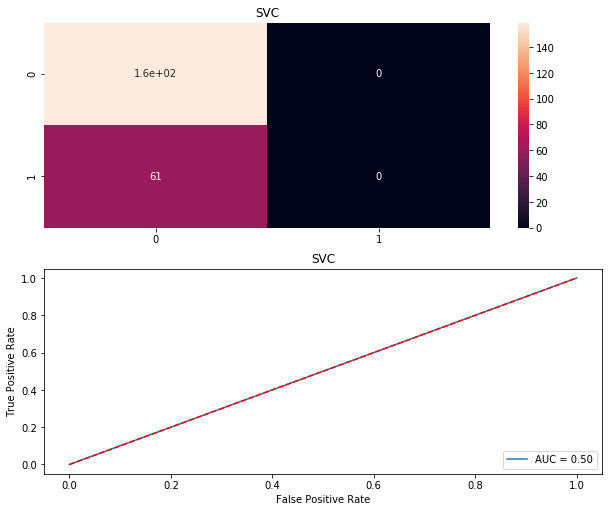

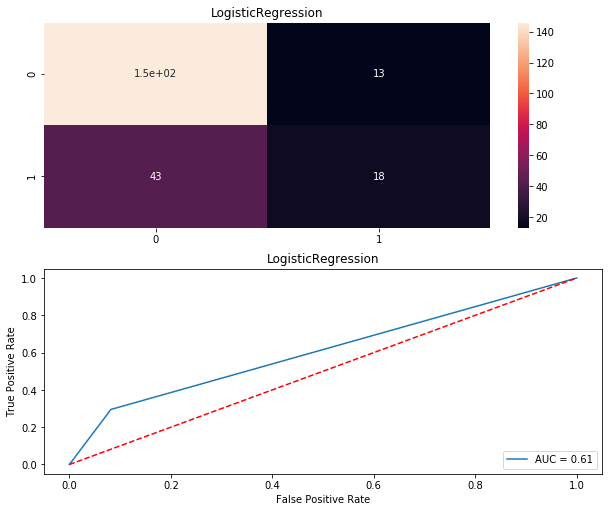

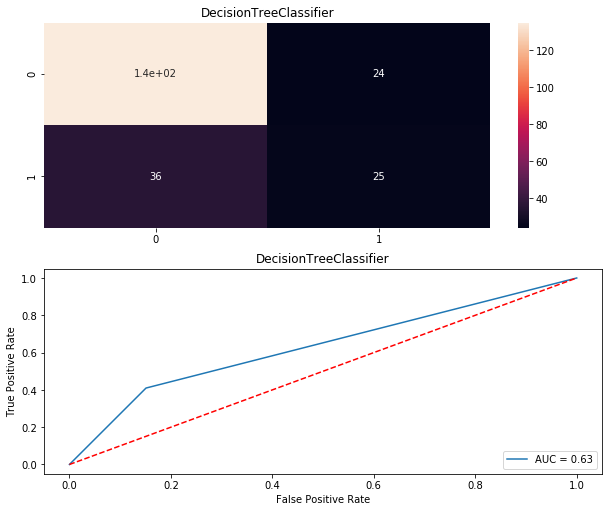

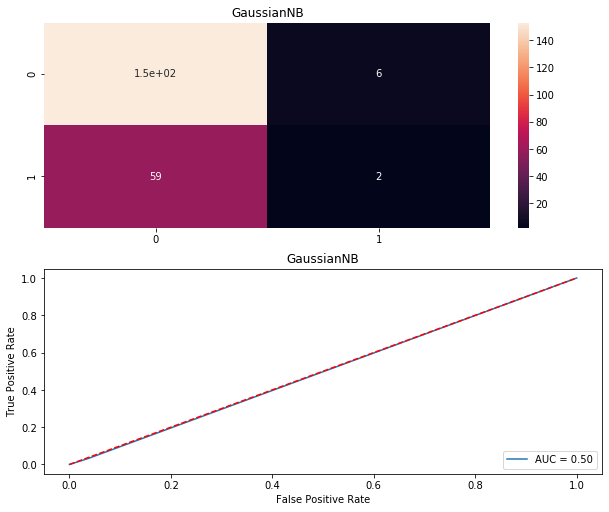

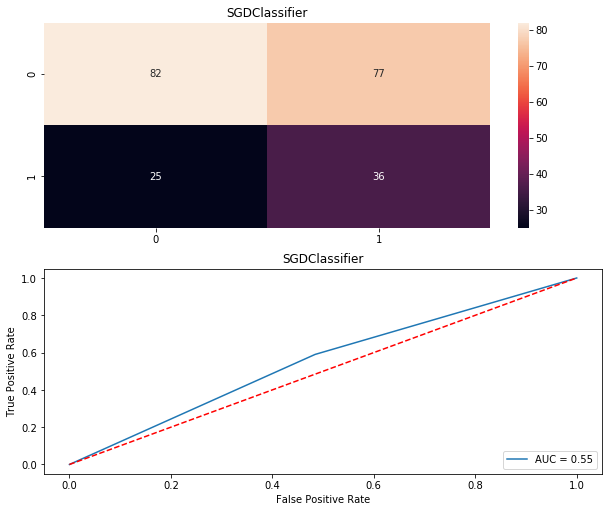

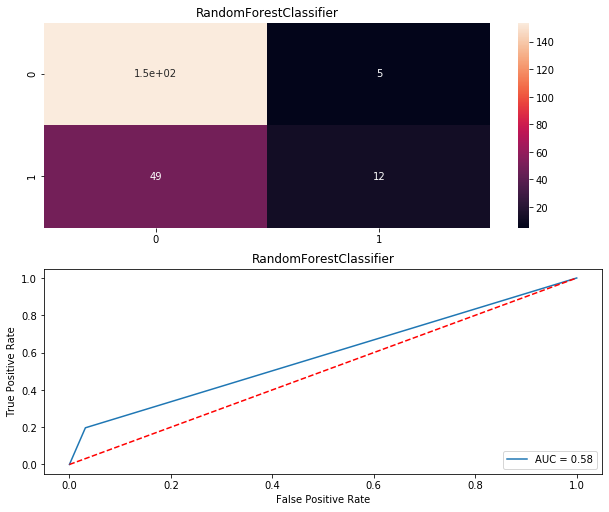

In [259]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [260]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,69.545455,73.707431,49.628828
1,SVC,72.272727,75.301530,50.000000
2,LogisticRegression,74.545455,77.611771,60.666048
3,DecisionTreeClassifier,72.727273,72.392379,62.944633
4,GaussianNB,70.454545,74.103470,49.752552
5,SGDClassifier,53.636364,50.897060,55.294360
6,RandomForestClassifier,75.454545,78.102780,58.263739


In [261]:
# Boosting Techquines for imporve the model performance 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
ad_pred=gb.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7363636363636363
[[142  19]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       161
           1       0.51      0.34      0.41        59

   micro avg       0.74      0.74      0.74       220
   macro avg       0.65      0.61      0.62       220
weighted avg       0.71      0.74      0.72       220



In [262]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=50,base_estimator=LR,algorithm='SAMME')
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7227272727272728
[[142  19]
 [ 42  17]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.47      0.29      0.36        59

   micro avg       0.72      0.72      0.72       220
   macro avg       0.62      0.59      0.59       220
weighted avg       0.69      0.72      0.70       220



In [263]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
sv=SVC()
ad=AdaBoostClassifier(n_estimators=50,base_estimator=sv,algorithm='SAMME')
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7318181818181818
[[161   0]
 [ 59   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       161
           1       0.00      0.00      0.00        59

   micro avg       0.73      0.73      0.73       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.73      0.62       220



In [264]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(Rf,'Auto_Insrnace_Predict_Fraud.obj')
OuModel=joblib.load('Auto_Insrnace_Predict_Fraud.obj')


# Conclusion
    1) One has to predict the claim amount in the Automobile insurance dataset.
       .Linear Regression
        .Remove the Outliers 
        .Apply PCA
        .Linear Model Prepration 
    2) One has to predict the insurance fraud in the Automobile insurance dataset.
            .Classification Regression
            . Hnadle Null Values
            .Apply Label Encoders        
            .Remove the Outliers         
            .Apply PCA
            .Classification Model Prepration 
